In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:

# importing libraries for KNN

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate



In [3]:

df = pd.read_csv("/home/hala/Downloads/train.csv")

In [4]:
#Handling Embarked feature by replace the missing values with the most common value

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [5]:
#Handling Cabin feature by making a new featur "Deck" taking the fist letter and replace the missing values with 'N'

df['Deck']=df["Cabin"]
df['Deck']=df["Deck"].str.slice(0,1)
df['Deck']=df["Deck"].fillna("N")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [6]:
#change the 'sex' , 'Embarked' , 'Deck' to numbers
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

df.Deck.replace(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [1, 2, 3,4,5,6,7,8,9], inplace=True)



In [7]:
##not for this session
#First method of age
#use sklearn to applay the Linear Regression to predict the missing values of the age
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
data_with_null=df[['Survived' ,'Pclass','SibSp','Parch','Fare','Deck','Embarked','Age']]
data_without_null=data_with_null.dropna()
train=data_without_null.iloc[:,:7]
target=data_without_null.iloc[:,7]
lin.fit(train,target)
test=data_with_null.iloc[:,:7]
pridect_Age=pd.DataFrame(lin.predict(test))



data_with_null.Age.fillna(pridect_Age[0] ,inplace=True)

df['pridect_Age']=data_with_null.Age.astype(int)


In [8]:
##not for this session
#Second method of age
#use sklearn to applay the KNNImputer to predict the missing values of the age
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
df_filled=pd.DataFrame(imputer.fit_transform(df[['Survived' ,'Pclass','SibSp','Parch','Fare','Deck','Embarked','Age']]),)
df['KNN_pridect_Age']=df_filled[7].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,pridect_Age,KNN_pridect_Age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,22,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,38,38
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,26,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,35,35
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,1,27,27
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,7,19,19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1,1,23,33
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,2,26,26


In [9]:
##not for this session
#Third method of age

#Extract the titles of name to calculate the mean age of each title
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [10]:
##not for this session
title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr',
                   'Dona': 'Mrs'}
df['Title'] = df['Title'].map(title_reduction)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [11]:
##not for this session
#replacing NaN with the mean value of each title
for title, age in df.groupby('Title')['Age'].mean().iteritems():
    print(title, age)
    df.loc[(df['Title']==title) & (df['Age'].isnull()), 'Age'] = age

df.isnull().sum()

Dr 42.0
Master 4.574166666666667
Miss 21.86
Mr 32.74014778325123
Mrs 35.981818181818184
Rev 43.166666666666664


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Deck                 0
pridect_Age          0
KNN_pridect_Age      0
Title                0
dtype: int64

In [12]:
df['Age']=df['Age'].astype(int)


In [13]:
df.drop(['Name','Ticket','Cabin','Title'] ,axis=1 , inplace=True)

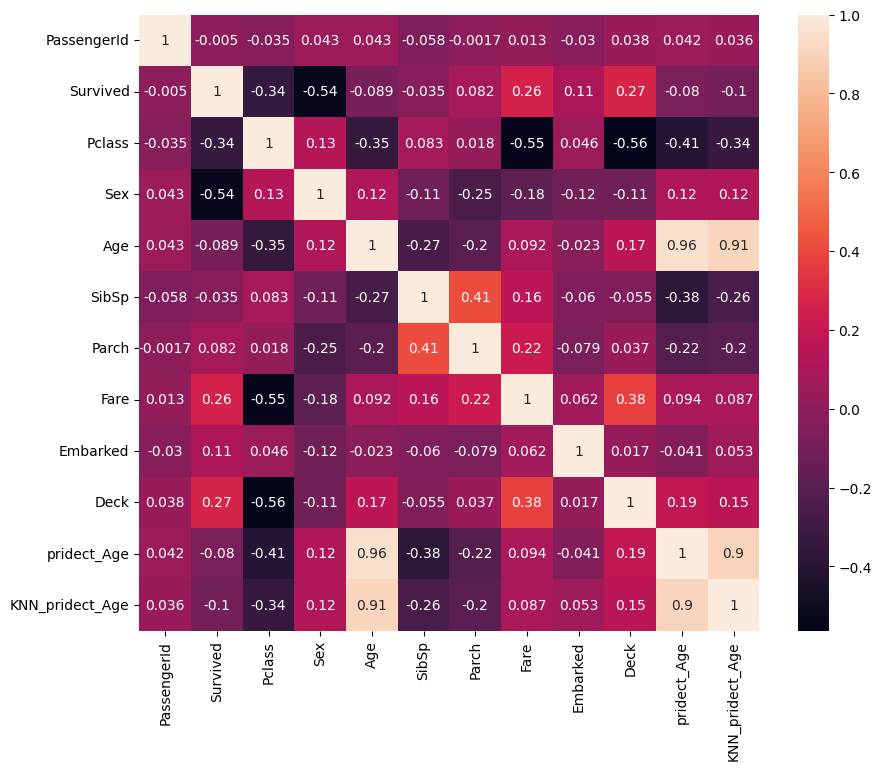

In [14]:
#session start
#Finding correlations to determine the necessary features by heatmap
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [15]:
#First : Age by the mean value of title

In [16]:
#determine the necessary features 
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']

#split dataset by 0.25 for test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [17]:
#Logistic Regression

LR=LogisticRegression().fit(X_train,y_train)

In [18]:
y_predict=LR.predict(X_test)

In [19]:
con_mat=confusion_matrix(y_test,y_predict)

In [20]:
con_mat=pd.DataFrame(con_mat,columns=['predicted No','predicted Yes'],index=['actual No','actual Yes'])

In [21]:
print(con_mat)

            predicted No  predicted Yes
actual No            121             20
actual Yes            20             62


In [22]:
score=accuracy_score(y_predict,y_test)

In [23]:
print(score)

0.820627802690583


In [24]:
#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)
    




 CV accuracy for k=1 is 68

 CV accuracy for k=2 is 69

 CV accuracy for k=3 is 69

 CV accuracy for k=4 is 70

 CV accuracy for k=5 is 70

 CV accuracy for k=6 is 69

 CV accuracy for k=7 is 69

 CV accuracy for k=8 is 69

 CV accuracy for k=9 is 71

 CV accuracy for k=10 is 70

 CV accuracy for k=11 is 70

 CV accuracy for k=12 is 69

 CV accuracy for k=13 is 70

 CV accuracy for k=14 is 70

 CV accuracy for k=15 is 70

 CV accuracy for k=16 is 70

 CV accuracy for k=17 is 69

 CV accuracy for k=18 is 69

 CV accuracy for k=19 is 69
8


In [25]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
score

[[123  18]
 [ 20  62]]


0.820627802690583

In [26]:
##Second Age by Linear Regression

In [27]:

X=df[['Pclass', 'Sex', 'pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
#Logistic Regression

LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)


In [28]:

score=accuracy_score(y_predict,y_test)
print(con_mat)
print(score)

            predicted No  predicted Yes
actual No            121             20
actual Yes            20             62
0.8026905829596412


In [29]:
#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)
    




 CV accuracy for k=1 is 70

 CV accuracy for k=2 is 71

 CV accuracy for k=3 is 72

 CV accuracy for k=4 is 69

 CV accuracy for k=5 is 72

 CV accuracy for k=6 is 74

 CV accuracy for k=7 is 74

 CV accuracy for k=8 is 71

 CV accuracy for k=9 is 73

 CV accuracy for k=10 is 73

 CV accuracy for k=11 is 75

 CV accuracy for k=12 is 73

 CV accuracy for k=13 is 74

 CV accuracy for k=14 is 74

 CV accuracy for k=15 is 75

 CV accuracy for k=16 is 74

 CV accuracy for k=17 is 75

 CV accuracy for k=18 is 74

 CV accuracy for k=19 is 73
10


In [30]:
#LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
score

[[111  26]
 [ 17  69]]


0.8026905829596412

In [31]:
##Third :  KNN

In [32]:
X=df[['Pclass', 'Sex', 'KNN_pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

#Logistic Regression
LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)
score=accuracy_score(y_predict,y_test)
print(con_mat)
print(score)

            predicted No  predicted Yes
actual No            121             20
actual Yes            20             62
0.8340807174887892


In [33]:
#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)
    




 CV accuracy for k=1 is 70

 CV accuracy for k=2 is 68

 CV accuracy for k=3 is 69

 CV accuracy for k=4 is 70

 CV accuracy for k=5 is 69

 CV accuracy for k=6 is 71

 CV accuracy for k=7 is 72

 CV accuracy for k=8 is 73

 CV accuracy for k=9 is 71

 CV accuracy for k=10 is 72

 CV accuracy for k=11 is 71

 CV accuracy for k=12 is 73

 CV accuracy for k=13 is 73

 CV accuracy for k=14 is 73

 CV accuracy for k=15 is 73

 CV accuracy for k=16 is 71

 CV accuracy for k=17 is 72

 CV accuracy for k=18 is 72

 CV accuracy for k=19 is 71
12


In [35]:
#LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
score

[[113  18]
 [ 21  71]]


0.8340807174887892

In [ ]:
#The best model is Logistic Regression with prdecting Age with KNN